# Data Scientist: Module 2 Demonstration (Supervised Machine Learning)

In this Notebook the learned functionality should be demonstrated on 3 questions on the topic of development indicators of different nations. The data is taken from the site of the Worldbank (see (here)[https://databank.worldbank.org/source/world-development-indicators/preview/on#]). Questions based on the data:

- Is there a connection between economic success and income euqlity? This should be demonstrated by using linear regression
- which feature can best explain the literacy rate of a country using Shaply values
- classify countries into those with a low and a high literacy rate based on economic success and evaluate the predictions using a Confusion Matrix

The data is from 2020, since the most recent data from 2023 contains more missing data. 

## Question 1: Dependency between economix success and income euality

The x values are the GNI (Gross National Income per capita) and the y values are the Gini coefficients of the countries (high GINI = high income inequality)

In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

### Load and clean data

In [3]:
# Load data from csv file into a Pandas DataFrame:
df = pd.read_csv("worldbank_development.csv", sep=',')
df = df.dropna(how='any',axis=0)
df.head(1)

,Time,Time Code,Country Name,Country Code,"Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]","Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]",Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS],"Contraceptive prevalence, any method (% of married women ages 15-49) [SP.DYN.CONU.ZS]",Domestic credit provided by financial sector (% of GDP) [FS.AST.DOMS.GD.ZS],Electric power consumption (kWh per capita) [EG.USE.ELEC.KH.PC],...,"School enrollment, primary (% gross) [SE.PRM.ENRR]","School enrollment, primary and secondary (gross), gender parity index (GPI) [SE.ENR.PRSC.FM.ZS]","School enrollment, secondary (% gross) [SE.SEC.ENRR]",Surface area (sq. km) [AG.SRF.TOTL.K2],Tax revenue (% of GDP) [GC.TAX.TOTL.GD.ZS],Terrestrial and marine protected areas (% of total territorial area) [ER.PTD.TOTL.ZS],"Total debt service (% of exports of goods, services and primary income) [DT.TDS.DECT.EX.ZS]",Urban population growth (annual %) [SP.URB.GROW],Gini index [SI.POV.GINI],Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS]
0,2020,YR2020,Argentina,ARG,31.492,6.35703367575527,98.8,70.1027087175867,45.7796388175674,2827.42739776861,...,110.617813110352,1.0242600440979,112.416679382324,2780400,10.8658963820494,9.4,43.0976319782414,0.615028911928924,42.7,0.541260004043579


The csv files contains missing data that is indicated as `..`, so the data is transformed:

In [16]:
class GNIGini:

    """
    Instances hold information for a single country about
    its GNI and Gini coefficient
    """

    def __init__(self, gni, gini, country):
        self.gni = self.to_float(gni)
        self.gini = self.to_float(gini)
        self.country = country

    def to_float(self, value) -> float:
        """
        If the value is a string casts it into a float and returns it
        """
        if isinstance(value, str):
            return float(value)
        return value


# Load data from DataFrame into list and filter out rows where at least one of GNI or Gini is missing:
x_column_name = "GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]"   
y_column_name = "Gini index [SI.POV.GINI]"
no_data_placeholder = ".."
data: list[GNIGini] = []
for index, row in df.iterrows():
    # Only use rows that have all needed data:
    if row[x_column_name] and row[x_column_name] != no_data_placeholder:
        if row[y_column_name] and row[y_column_name] != no_data_placeholder:
            data.append(GNIGini(gni=row[x_column_name], gini=row[y_column_name], country=row["Country Name"]))
data = sorted(data, key=lambda x: x.gni, reverse=False)

# Create the  matrix X and y vector used for training the model:  
x_list = [[elem.gni] for elem in data]
y_list = [elem.gini for elem in data]
countries = [elem.country for elem in data]

### Initial visualization

This can be helpful for selection the appropriate tools for anaysing the data

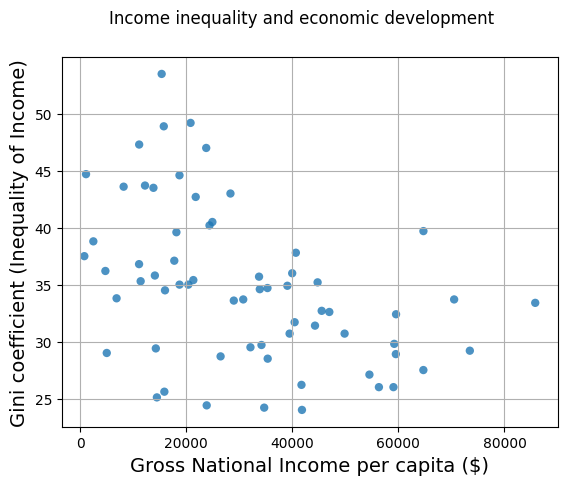

In [17]:
# Show how each country is located in a coordinate system with economic success an the x-axis
# and income inequality on the y axis
fig, ax = plt.subplots()
fig.suptitle("Income inequality and economic development")
ax.scatter([elem.gni for elem in data], [elem.gini for elem in data], alpha=0.8, edgecolors='none')
ax.grid(True)
ax.set_xlabel("Gross National Income per capita ($)", size=14)
ax.set_ylabel("Gini coefficient (Inequality of Income)", size=14)
plt.show()

As you can see there is no real linear dependency between the two features but it can be approximated by a curve from the top left
to the bottom right with a slight upward drift in the high income region. So a simple summary would be that a high income inequality 
is more probable in low income countries. Now a linear model should be fit to the data points:

### Train the model

In [18]:
# split the data into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(x_list, y_list, test_size=0.2)
linear_model = LinearRegression()
# Train the linear model and get predictions for the test data:
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
# Show the RMSE which is proportional to the sum of squared
# differences between the actual value and the prediction
root_mean_squared_error(y_test, y_pred)

7.371929752354872

### Visualization of results

Now show the line that was used for predictions and label those countries that would have been predicted with a significant error:

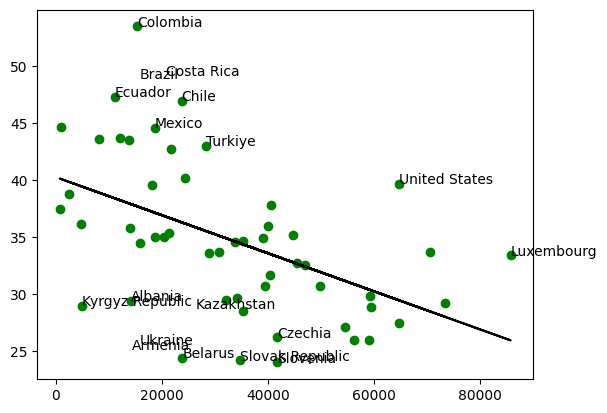

In [19]:
plt.scatter(X_train, y_train,color='g')
plt.plot(X_train, linear_model.predict(X_train),color='k') # the predicition line
predicitions_all = linear_model.predict(x_list)
for idx, val in enumerate(x_list):
    gini_actual = y_list[idx]
    estimated = predicitions_all[idx]
    distance = math.fabs(estimated - gini_actual)
    if distance > 7:
        plt.annotate(countries[idx], (val[0], gini_actual))

plt.show()

In [20]:
linear_model.coef_

array([-0.00016711])

The coefficient is negative as expected, but is very small due to the very different scaling of the two features. To get a value
that is simpler to interpret the data can be normalized, so that all values fall between 0 and 1. To do this one can use `sklearn.preprocessing.normalize` for example. Another possibility is to standardize the data. This is based on the assumption that the values are normal distributed. So from each value the mean is subtracted to get a new mean of 0.

## Question 2: Explain the target variable Life Expectancy

The X variables are 5 features that may have some connection to the life expectancy in a country (the target value). Those 5 are the GNI, the population density, the mortality rate under the age of 5, the prevalence of HIV and the percentage of the population that completes primary school.

### Load and clean data

In [21]:
import shap
import xgboost

# Define the features from the data file that should be checked 
# on their correlation with the target value, the life expectancy: 
x_columns = [
    "GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]",
    "Population density (people per sq. km of land area) [EN.POP.DNST]",
    "Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]",
    "Prevalence of HIV, total (% of population ages 15-49) [SH.DYN.AIDS.ZS]",
    "Primary completion rate, total (% of relevant age group) [SE.PRM.CMPT.ZS]"
]
feature_names = ["GNI", "Pop. Density", "Mort Rate", "HIV", "Primary School completed"] # used in the visualization
y_column = "Life expectancy at birth, total (years) [SP.DYN.LE00.IN]"

class DataRow:

    """
    Represents a single country or row in the file
    """

    def __init__(self, gni, pop_dens, mortality_rate, hiv, primary, country):
        self.gni = self.to_float(gni)
        self.pop_dens = self.to_float(pop_dens)
        self.mortality_rate = self.to_float(mortality_rate)
        self.hiv = self.to_float(hiv)
        self.primary = self.to_float(primary)
        self.country = country

    @staticmethod
    def to_float(value) -> float:
        """
        If the input value is a string the function casts it into a float
        """
        if isinstance(value, str):
            return float(value)
        return value

    def to_list(self):
        """
        Returns the attributes of the instance as list
        """
        return [self.gni, self.pop_dens, self.mortality_rate, self.hiv, self.primary]

            
# Extract the data from the Pandas DataFrame while at the same time
# skip data that has not all required data:
data: list[list[float]] = []  # 2D array = X
y_data: list[float] = []
for index, row in df.iterrows():
    elem_data = []
    invalid = False
    for col in x_columns:
        if not row[col]:
            invalid = True
            break
        if row[col] == no_data_placeholder: 
            invalid = True
            break
        elem_data.append(row[col])

    if not invalid:
        data.append(DataRow(*elem_data, country=row["Country Name"]).to_list())
        y_data.append(float(row[y_column]))

In [22]:
# Train model
X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.2)
model = xgboost.XGBRegressor().fit(X_train, y_train)

### Visualization of results

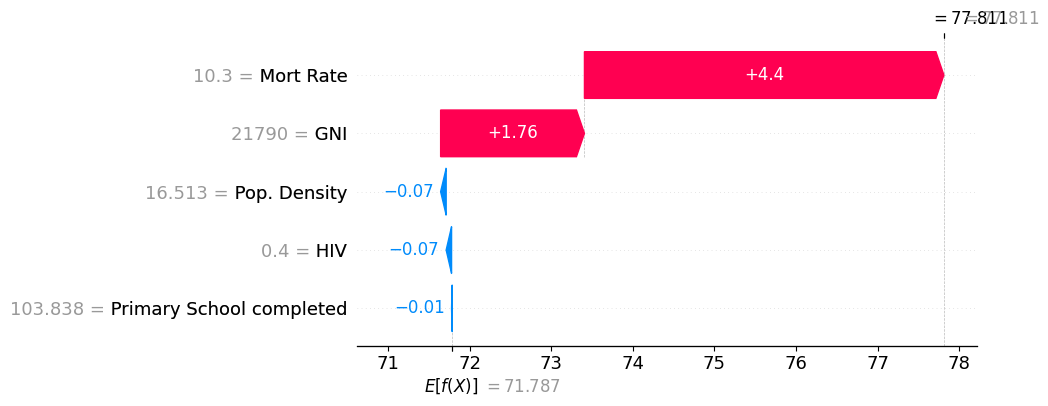

In [23]:
# Visualize feature importance:
explainer = shap.Explainer(model, feature_names=feature_names)
shap_values = explainer(data)
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

Explanation: 75.878 is the actual life expectancy of the first country that was used for model training. As you can see the 
mortality rate under the age of 5 has the greatest impact, which is not surprising since it effects the life expectancy directly
compared to the other features which may do this only inddirectly.

## Question 3: Confusion Matrix

Since there are no categorical values present in the data set the life expectancy is used to create two classes: high and low countries, the threshold being the 75th percentil = 77.4 years. It should be predicted if a country is in the high or low class. First create a descriptive statistic: 

In [24]:
# Extract the Life Expectancy column from the DataFrame:
life_exp = df[df["Life expectancy at birth, total (years) [SP.DYN.LE00.IN]"] != no_data_placeholder]
life_exp = life_exp["Life expectancy at birth, total (years) [SP.DYN.LE00.IN]"]
life_exp.astype(float).describe()

count    265.000000
mean      72.175783
std        7.216460
min       50.596000
25%       66.924000
50%       72.647321
75%       77.449874
max       86.089000
Name: Life expectancy at birth, total (years) [SP.DYN.LE00.IN], dtype: float64

### Initial visualization

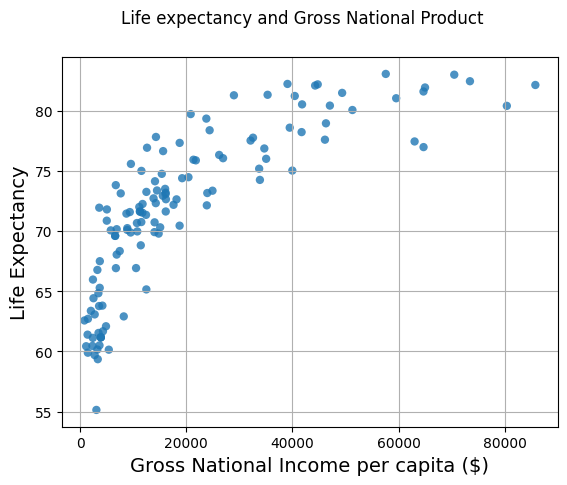

In [25]:
# First, visualize how strong the life expectancy and GNI are correlated:
fig, ax = plt.subplots()
fig.suptitle("Life expectancy and Gross National Product")
x_list = [elem[0] for elem in data]
y_list = y_data
ax.scatter(x_list, y_list, alpha=0.8, edgecolors='none')
ax.grid(True)
ax.set_xlabel("Gross National Income per capita ($)", size=14)
ax.set_ylabel("Life Expectancy", size=14)
plt.show()

### Prepare data and train model

As you can see the correlation is very high, but there are no clearly separated classes

In [26]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Create a new y list that transform the float values into boolean values:
threshold_high_life_expectancy = 77.4
y_data = [elem > threshold_high_life_expectancy for elem in y_data]
X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.3)
# Train the Decision Tree model:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# See how well the classification worked by creating a confusion matrix:
confusion_matrix(y_test, y_pred, labels=[False, True])


array([[25,  4],
       [ 3,  7]])

### Show different metrics to evaluate quality of trained classifier

In [27]:
print("Recall", recall_score(y_test, y_pred, average='micro'))
print("Precision", precision_score(y_test, y_pred, average='micro'))
print("F1", f1_score(y_test, y_pred, average='micro'))

Recall 0.8205128205128205
Precision 0.8205128205128205
F1 0.8205128205128205
